In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg' # For mac users with Retina display

import numpy as np
from getdist import plots, loadMCSamples, MCSamples
import getdist
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rc, rcParams

def SetPlotStyle():
    rc('text',usetex=True)
    rc('font',**{'family':'serif','serif':['Computer Modern']})

    plt.rcParams['axes.linewidth']  = 1.2
    plt.rcParams['axes.labelsize']  = 25
    plt.rcParams['axes.titlesize']  = 5
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['xtick.major.size'] = 3
    plt.rcParams['ytick.major.size'] = 3
    plt.rcParams['xtick.minor.size'] = 2
    plt.rcParams['ytick.minor.size'] = 2
    plt.rcParams['legend.fontsize']  = 25
    plt.rcParams['legend.frameon']  = False
    plt.rcParams['xtick.major.width'] = 1
    plt.rcParams['ytick.major.width'] = 1
    plt.rcParams['xtick.minor.width'] = 1
    plt.rcParams['ytick.minor.width'] = 1
    
SetPlotStyle()

In [3]:
def adjust_chains(chains):
    chains[:,0] *= 10
    chains[:,2] *= 100
    chains[:,3] /= 10
    return chains

In [7]:
chains_folder = "../data/capse_chains/"

samples_Capse_Planck_NUTS = adjust_chains(np.load(chains_folder+"chains_Planck_NUTS.npy"))
samples_Capse_Planck_PF = adjust_chains(np.load(chains_folder+"chains_Planck_PF.npy"))
samples_Capse_Planck_MCHMC_multi = adjust_chains(np.load(chains_folder+"chains_Planck_MCHMC_multi.npy"))
['logA','ns', 'H0','omegabh2','omegach2','tau', 'A_planck']
my_label = ['logA','ns', 'H0','omegabh2','omegach2','tau', 'A_planck']#["logA", "n_s", "H0", "omega_b", "omega_cdm", "tau_reio", "yp2"]
chains_Capse_Planck_NUTS = MCSamples(samples=samples_Capse_Planck_NUTS, names = my_label, labels = my_label, label = "Capse + NUTS")
chains_Capse_Planck_PF = MCSamples(samples=samples_Capse_Planck_PF, names = my_label, labels = my_label, label = "Capse + Pathfinder", settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.4, 'smooth_scale_1D':0.4})
chains_Capse_Planck_MCHMC_multi = MCSamples(samples=samples_Capse_Planck_MCHMC_multi, names = my_label, labels = my_label, label = "Capse + MCHMC")

Removed no burn in
Removed no burn in
Removed no burn in


In [5]:
path_chains = '../data/p18_ttteee_lite_lcdm_chains/'
chains_Cobaya_Planck = loadMCSamples(path_chains+"p18_ttteee_lite_lcdm", settings = {'ignore_rows': 0.3, 'label' : "Cobaya"})
chains_Cobaya_Planck.label = "CAMB + Cobaya"

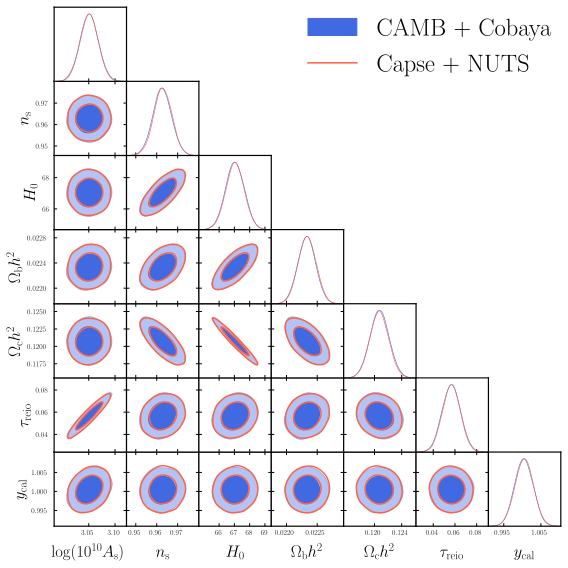

In [6]:
g = plots.get_subplot_plotter(width_inch=8, )
g.settings.scaling_factor = 1.5
g.settings.title_limit_fontsize = 12
g.settings.axes_labelsize = 20
g.settings.legend_fontsize = 28
# g.settings.linewidth=1
g.triangle_plot([chains_Cobaya_Planck, chains_Capse_Planck_NUTS,], 
                ["logA", "ns", "H0", "omegabh2", "omegach2", "tau", "A_planck"],
                filled=[True,False], 
                lws=[1,1.5],
                contour_colors=['royalblue','tomato'],
                legend_loc='upper right', 
                # title_limit=1,
                linewidth=4)
# plt.savefig("contour_comparison_Planck.png")
plt.savefig("contour_comparison_Planck.pdf")

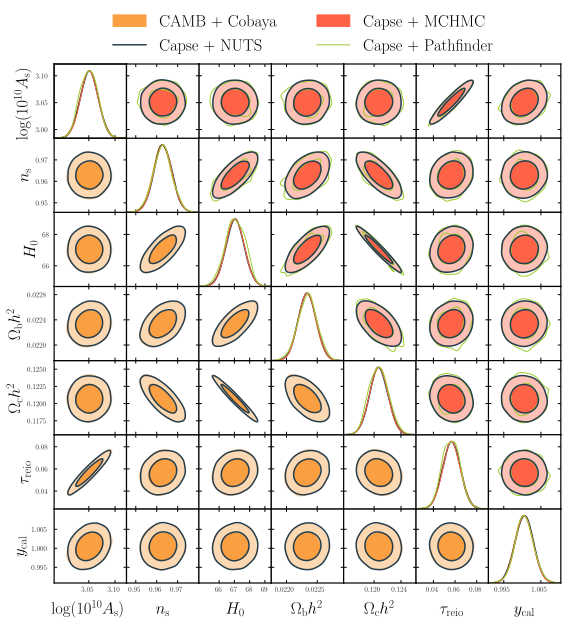

In [8]:
g = plots.get_subplot_plotter(width_inch=8)
g.settings.scaling_factor = 1.5
g.settings.title_limit_fontsize = 12
g.settings.axes_labelsize = 20
g.settings.legend_fontsize = 20


g.triangle_plot([chains_Cobaya_Planck, chains_Capse_Planck_NUTS,], 
                ["logA", "ns", "H0", "omegabh2", "omegach2", "tau", "A_planck"],
                filled=[True,False], 
                contour_lws=[1,1.5],
                upper_roots = [chains_Capse_Planck_MCHMC_multi,chains_Capse_Planck_PF,chains_Capse_Planck_NUTS,],
                contour_colors=[ "#fa9f42","#233d4d",],
                upper_kwargs = {'contour_colors':["tomato",'#9FCC2E',"#233d4d",], 'contour_lws':[1,1,1.5], 'filled':[True,False,False]}, 
                legend_ncol=2,
                linewidth=4)
                
plt.savefig("contour_comparison_Planck_NUTS_vs_MCHMC.pdf", bbox_inches='tight')